In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import pandas as pd
import seaborn as sns

In [3]:
cat_weights = stats.truncnorm((2 - 4) / 3, (14 - 4) / 3, loc=4, scale=3).rvs(100)
cat_heights = stats.truncnorm((10 - 25) / 3, (35 - 25) / 3, loc=25, scale=3).rvs(100)

dog_weights = stats.truncnorm((7 - 30) / 5, (110 - 30) / 5, loc=30, scale=10).rvs(100)
dog_heights = stats.truncnorm((15 - 50) / 7, (90 - 50) / 7, loc=50, scale=7).rvs(100)

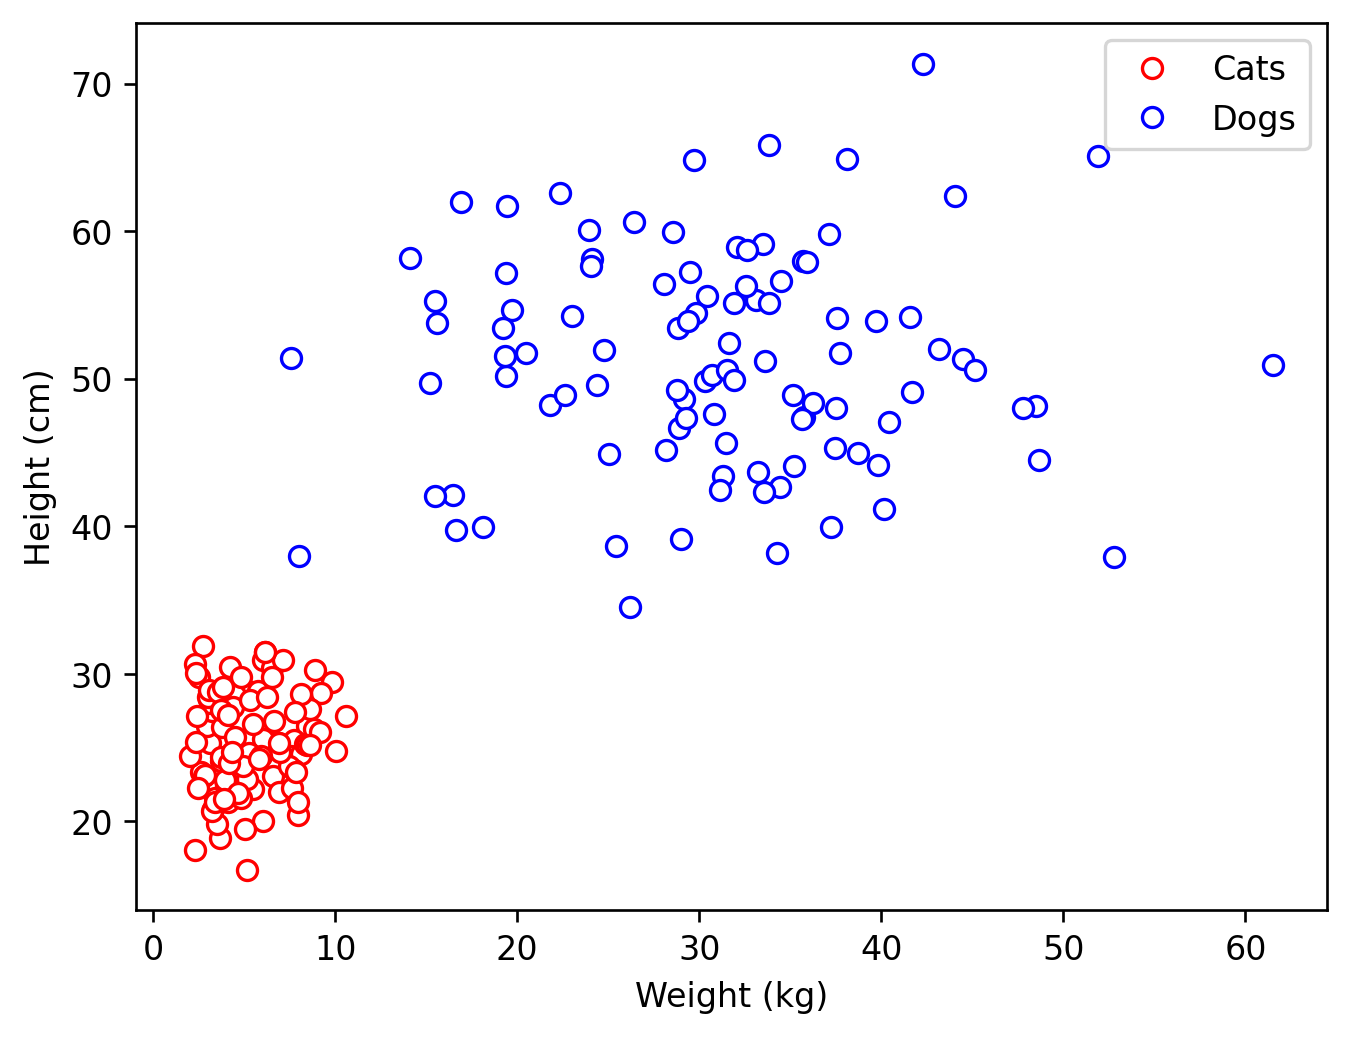

In [10]:
plt.figure(dpi=240)

plt.plot(cat_weights, cat_heights, ls='', marker='o', mfc='w',  mec='red', label='Cats')
plt.plot(dog_weights, dog_heights, ls='', marker='o', mfc='w',  mec='blue', label='Dogs') 

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()

In [11]:
# combine the two datasets
cat_data = np.column_stack((cat_weights, cat_heights))
dog_data = np.column_stack((dog_weights, dog_heights))

data = np.vstack((cat_data, dog_data))

In [12]:


df = pd.DataFrame(data, columns=['Weight', 'Height'])

In [39]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 140


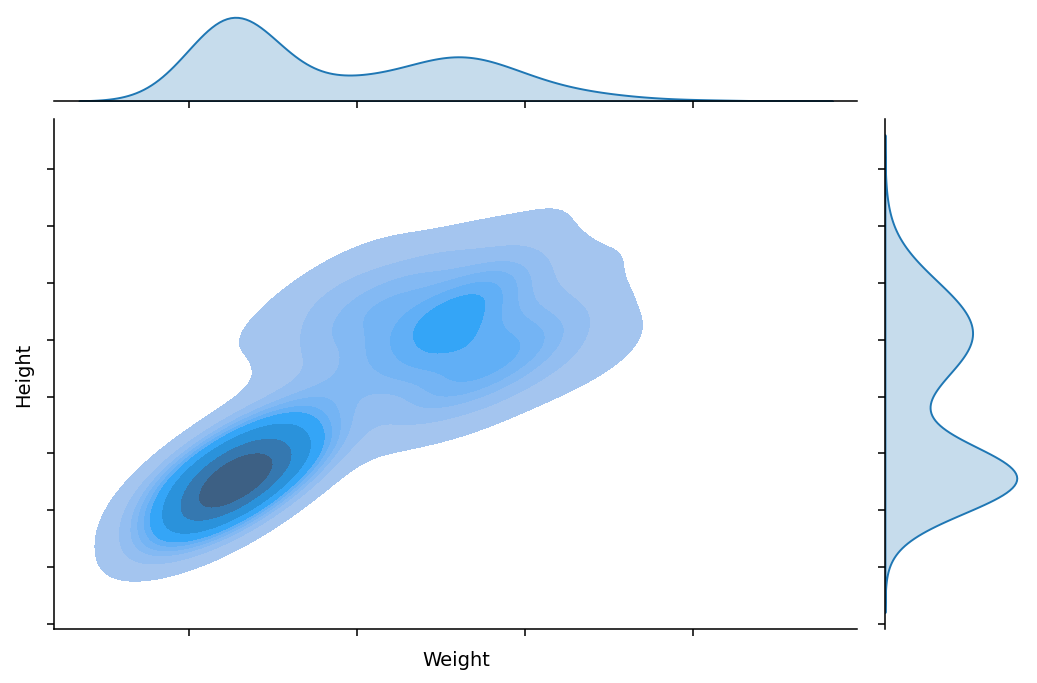

In [43]:

fig = sns.jointplot(data=df, x='Weight', y='Height', kind='kde', fill=True)
# turn off axis lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig.fig.set_size_inches((8, 5))
# hide all ticks and numbers
# fig.ax_joint.tick_params(left=False, bottom=False)
fig.ax_joint.set_yticklabels([])
fig.ax_joint.set_xticklabels([])

# sns.despine(left=True, bottom=True)

plt.show()

In [23]:
fig.ax_joint

<Axes: xlabel='Weight', ylabel='Height'>

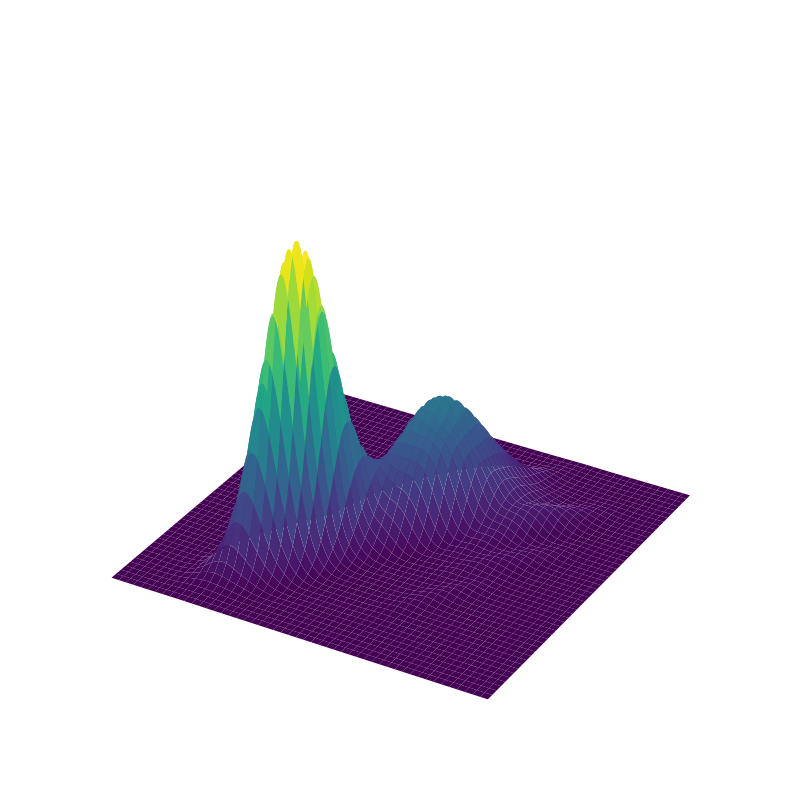

In [37]:
# 3D seaborn plot showing distribution surface
X = np.linspace(-30, 80, 1000)
Y = np.linspace(0, 80, 1000)

X, Y = np.meshgrid(X, Y)

Z = stats.gaussian_kde(data.T)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
# turn off axes
ax.set_axis_off()
# turn off gridlines
ax._axis3don = False
plt.show()